In [2]:
import matplotlib
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from DBLR_cal import BLRc
from IPython.display import Image
from IPython.core.display import HTML 
%matplotlib nbagg

# Definitions and Data

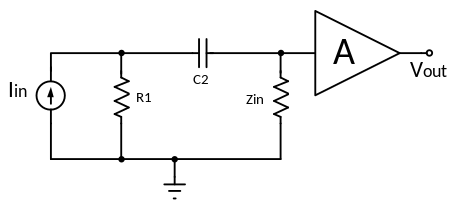

In [3]:
PATH = "./Rpar_Images/"
Image(filename = PATH + "FEE_simple.png")

In [4]:
f_sample = (1/25E-9); # Hz


R1=1567; 
Zin=62; 
C2=8E-9; 
MEASURED_GAIN = 582.237
A=MEASURED_GAIN/(R1*Zin/(R1+Zin))
GAIN=(R1*Zin/(R1+Zin))*A 
# Seems stupid. It's just to remember true GAIN measured in simulation 

freq_HPF=1/((R1+Zin)*C2); print 'HPF1(kHz) =',freq_HPF/(1E3*2*np.pi)
freq_LPF1=3E6*2*np.pi; print 'LPF1(MHz) =',freq_LPF1/(1E6*2*np.pi)
freq_LPF2=10E6*2*np.pi; print 'LPF2(MHz) =',freq_LPF2/(1E6*2*np.pi)

freq_HPFd=freq_HPF / (f_sample*np.pi) ; print 'HPF(rad/sec) =',freq_HPF,'// (half-cycles/sample) =',freq_HPFd
freq_LPF1d=freq_LPF1 / (f_sample*np.pi) ; print 'LPF1(rad/sec) =',freq_LPF1,'// (half-cycles/sample) =',freq_LPF1d 
freq_LPF2d=freq_LPF2 / (f_sample*np.pi) ; print 'LPF2(rad/sec) =',freq_LPF2,'// (half-cycles/sample) =',freq_LPF2d



HPF1(kHz) = 12.2126260813
LPF1(MHz) = 3.0
LPF2(MHz) = 10.0
HPF(rad/sec) = 76734.1927563 // (half-cycles/sample) = 0.000610631304067
LPF1(rad/sec) = 18849555.9215 // (half-cycles/sample) = 0.15
LPF2(rad/sec) = 62831853.0718 // (half-cycles/sample) = 0.5


In [5]:
b0, a0 = signal.butter(1, freq_HPFd, 'high', analog=False)
b1, a1 = signal.butter(1, freq_LPF1d, 'low', analog=False); b2, a2 = signal.butter(4, freq_LPF2d, 'low', analog=False);
a_aux=np.convolve(a0,a1,mode='full'); a=np.convolve(a_aux,a2,mode='full')
b_aux=np.convolve(b0,b1,mode='full'); b_aux2=np.convolve(b_aux,b2,mode='full'); b=GAIN*b_aux2

<IPython.core.display.Javascript object>


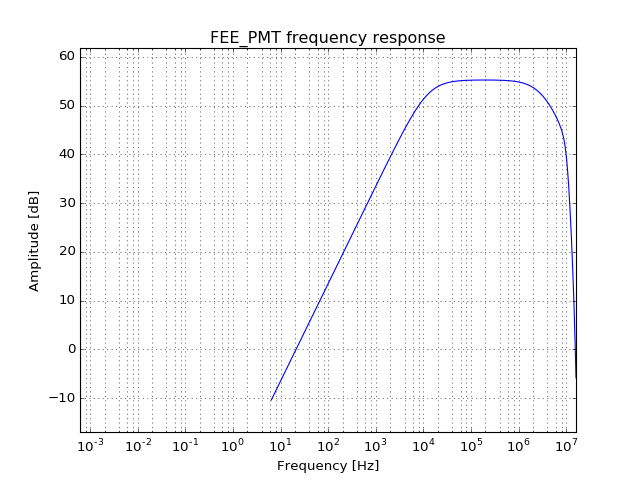

In [6]:
w, h = signal.freqz(b, a, worN=np.logspace(-6,0.4,40000))                # Freqz outputs rad/sample (desnorm ===> f_sample/(2*pi))
plt.figure(2)
plt.semilogx(w*(f_sample)/(2*np.pi), 20 * np.log10(abs(h)))
plt.title('FEE_PMT frequency response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(freq_HPFd, color='green') # cutoff frequency
plt.show()

In [7]:
signal_in = np.concatenate((np.zeros((1,1000)),np.ones((1,10000)),np.zeros((1,20000))),axis=1)
signal_out = signal.lfilter(b,a,signal_in[0,0:])

<IPython.core.display.Javascript object>


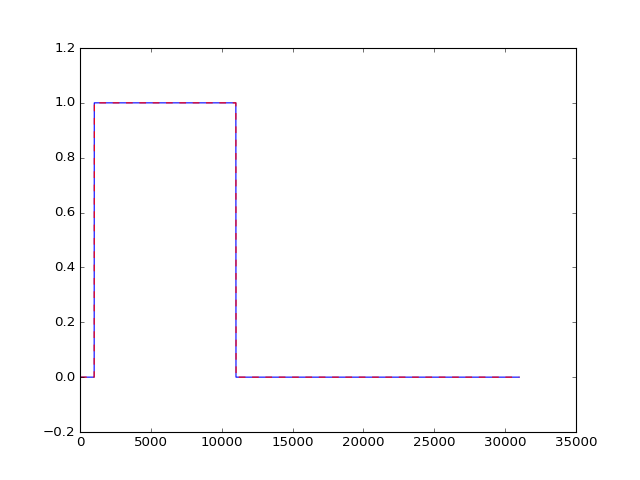

31000


In [8]:
recons = BLRc(signal_daq=signal_out,coef=freq_HPFd*np.pi,thr1 = 0.01)/GAIN
# BLR reconstruction with pure algortihm
plt.figure(1)
plt.plot(range(0,np.size(signal_in),1),signal_in[0,0:])
print np.size(signal_out)
plt.plot(range(0,np.size(recons),1),recons,'r--', linewidth=1)
plt.show()

In [9]:
print 'Input Energy =', np.sum(signal_in)
print 'Reconstructed Energy =', np.sum(recons)
print 'Error in Energy Computation (%) = ', (np.sum(signal_in)-np.sum(recons))/np.sum(signal_in)*100

Input Energy = 10000.0
Reconstructed Energy = 9999.99693326
Error in Energy Computation (%) =  3.06674181411e-05
